# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Your code here. 
student_data = pd.DataFrame({'StudentId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30 ], 'Tardiness': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,StudentId,Age,Tardiness
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [3]:
# Your code here.
import matplotlib.pyplot as plt

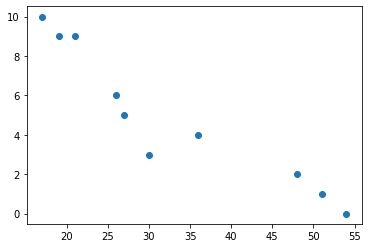

In [4]:
plt.scatter(student_data.Age, student_data.Tardiness)

In [5]:
student_data.dtypes

StudentId    int64
Age          int64
Tardiness    int64
dtype: object

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

I see three groups forming: the youngest group (between 18 and 22) is late very often (between 8-10 times), then tardiness count goes down  quite a bit in the second group of ages 25-37(ish). Their tardiness count is between 3 and 6. Then the oldest group (ages 47-54) is late the least (0-2). This would support the hypothesis that the younger the student the more often they're likely to be late, but there appear to be plateaus for age groups and tardiness. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
#Correlation:
student_data.corr()

,StudentId,Age,Tardiness
StudentId,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardiness,-0.347113,-0.939163,1.000000


In [7]:
#Covariance:
student_data.cov()

,StudentId,Age,Tardiness
StudentId,9.166667,7.722222,-3.722222
Age,7.722222,187.655556,-45.566667
Tardiness,-3.722222,-45.566667,12.544444


"“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.<br> 
Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not.[...] "When you divide the covariance values by the standard deviation, it essentially scales the value down to a limited range of -1 to +1. This is precisely the range of the correlation values." 
<br>
Source: https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22
<br>
"Covariance is a measure of how changes in one variable are associated with changes in a second variable. Specifically, covariance measures the degree to which two variables are linearly associated."
<br>
https://stats.stackexchange.com/questions/29713/what-is-covariance-in-plain-language
<br>
So this means the correlation is a function of covariance. The correlation matrix indicates there is a high negative correlation between age and tardiness count, i.e. the older the student, the less often they're late.<br>
The covariance matrix indicates how much the tardiness counts goes down (because it's negative) when the age goes up. 
<br>

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(student_data['Age'].values.reshape(-1,1), student_data['Tardiness'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
intercept = model.intercept_
slope = model.coef_

In [11]:
intercept = intercept[0]
slope = slope[0][0]
print(intercept)
print(slope)

12.888803363135771
-0.2428207709159809


In [12]:
predictions = [intercept + slope*x for x in student_data['Age']]
predictions

[8.760850257564096,
 0.5049440464207464,
 6.332642548404287,
 7.789567173900172,
 4.1472556101604585,
 1.2334063591686881,
 8.275208715732134,
 6.575463319320268,
 -0.22351826632719707,
 5.604180235656345]

In [13]:
residuals = [student_data['Tardiness'][i] - predictions[i] for i in range(len(student_data['Tardiness']))]
residuals

[1.2391497424359041,
 0.4950559535792536,
 -1.3326425484042872,
 1.2104328260998276,
 -0.14725561016045852,
 0.7665936408313119,
 0.7247912842678659,
 -0.5754633193202681,
 0.22351826632719707,
 -2.6041802356563446]

In [14]:
RMSE = np.sqrt((np.mean([residual**2 for residual in residuals])))
RMSE

1.1540884648655088

In [30]:
from scipy import stats
X = student_data['Age']
Y = student_data['Tardiness']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.24282077091598084
The intercept is: 12.88880336313577


In [31]:
#Say I'm 25, prediction: y=tardiness (see above)
#y = slope*x(25)+intercept

slope*25 + intercept

6.818284090236249

Plot your regression model on your scatter plot.

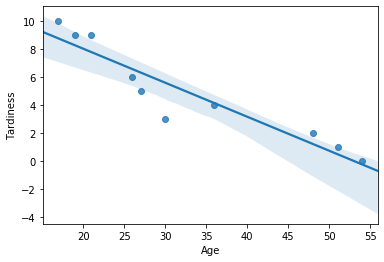

In [15]:
# Your code here. Swapped my x and y, because it makes more sense to have age as an x. 
sns.regplot(x="Age", y="Tardiness", data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Using basic common sense, I'd say there's likely more variables at work in predicting the tardiness of a given student, but for this exercise it looks to be pretty indicative. Then again I'm still having trouble understanding this, so I need to research this further.<br>
<br>
Predictions were: 
8.760850257564096,
 0.5049440464207464,
 6.332642548404287,
 7.789567173900172,
 4.1472556101604585,
 1.2334063591686881,
 8.275208715732134,
 6.575463319320268,
 -0.22351826632719707,
 5.604180235656345
 
10 predictions, 10 students aged: 17, 51, 27, 21, 36, 48, 19, 26, 54, 30. The model has predicted for the 54 year old to be late a negative amount of time, which is funny. Highest tardiness levels predicted for youngest student. Second highest for second youngest. Calculating for a student aged 25 (see above), the model-based formulate predicted tardiness count of +- 6.8. Falls pretty close to the 27 year old.<br>
<br>
I'd say it's behaving as expected.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [46]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles1 = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles1.head(5)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550


In [47]:
vehicles2 = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
vehicles2.head(5)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
# Your response here. 
vehicles1.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [49]:
vehicles2.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Most useful/relevant will be Cylinders, Fuel Barrels/Year and Combined MPG. Somewhat relevant (potential indicator) is Year (trend towards environmentally conscious cars would suggest that newer cars have less CO2 emmission. Cost doesn't have much to do with anything for this prediction. It might matter to consumers in their decisions about which car to buy, though.<br>
<br>
The most useful will probably be Fuel Barrels/Year, because that indicates how much fuel the car needs per year (is my understanding) from a normal amount of use? Not sure how they got to this. The more barrels of fuel a car goes through per year, the higher its CO2 emissions. 
<br>
<br>
"The acronym mpg stands for Miles Per Gallon – a measure of how far a car can travel if you put just one gallon of petrol or diesel in its tank. Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%."

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
# Your response here. 
import statsmodels.api as sm
X = vehicles2[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
Y = vehicles2['CO2 Emission Grams/Mile']
model = sm.OLS(Y,X)
results = model.fit()
predictions = results.predict(X)

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Wed, 11 Mar 2020   Prob (F-statistic):                        0.00
Time:                             14:04:39   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As were dealing with multiple variables, I guess a multilinear regression model would work best. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [50]:
# Your response here. 
results.summary()

/Users/pmoquette/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Tardiness   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.252
Method:                 Least Squares   F-statistic:                              4.375
Date:                Wed, 11 Mar 2020   Prob (F-statistic):                      0.0660
Time:                        13:55:48   Log-Likelihood:                         -30.028
No. Observations:                  10   AIC:                                      62.06
Df Residuals:                       9   BIC:                                      62.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0961      0.046      2.092      0.066      -0.008       0.200
==============================================================================
Omnibus:                        1.418   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                0.718
Skew:                           0.002   Prob(JB):                        0.698
Kurtosis:                       1.687   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 